### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [6]:
df = pd.read_csv('../../../Datasets/RQ1/svelte_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,v0.0.2,2016-11-20,1479665674,0.7,0,1.0,1.0,321,431,1931
1,1,v0.1.0,2016-11-20,1479700627,0.6,0,1.0,1.0,375,445,2190
2,2,v0.1.1,2016-11-22,1479819871,0.6,0,1.0,1.0,480,500,2735
3,3,v0.2.0,2016-11-25,1480107163,0.6,0,1.0,1.0,588,614,3492
4,4,v0.2.1,2016-11-25,1480112805,0.6,0,1.0,1.0,588,614,3499
5,5,v1.10.0,2017-03-04,1488604556,0.5,0,1.0,1.0,1567,1253,8363
6,6,v1.10.1,2017-03-06,1488835051,0.5,0,1.0,1.0,1569,1258,8373
7,7,v1.10.2,2017-03-06,1488839941,0.5,0,1.0,1.0,1572,1260,8376
8,8,v1.11.0,2017-03-07,1488914760,0.6,0,1.0,1.0,1746,1392,8885
9,9,v1.11.1,2017-03-08,1488994007,0.6,0,1.0,1.0,1753,1396,8922


### Information of the Dataframe 

In [7]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,40.000000,4.000000e+01,40.000000,40.0,40.0,40.0,40.000000,40.000000,40.00000
mean,19.500000,1.569839e+09,0.515000,0.0,1.0,1.0,5932.375000,4635.525000,35463.12500
std,11.690452,7.030043e+07,0.105125,0.0,0.0,0.0,3262.210873,2515.291959,20677.88328
min,0.000000,1.479666e+09,0.400000,0.0,1.0,1.0,321.000000,431.000000,1931.00000
25%,9.750000,1.508427e+09,0.400000,0.0,1.0,1.0,1753.000000,1396.000000,8922.00000
50%,19.500000,1.567592e+09,0.500000,0.0,1.0,1.0,6797.000000,4912.000000,37012.50000
75%,29.250000,1.619985e+09,0.600000,0.0,1.0,1.0,8149.500000,6380.000000,51303.00000
max,39.000000,1.688024e+09,0.700000,0.0,1.0,1.0,10688.000000,8307.000000,67123.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            40 non-null     int64  
 1   version               40 non-null     object 
 2   release_date          40 non-null     object 
 3   timestamp             40 non-null     int64  
 4   sqale_debt_ratio      40 non-null     float64
 5   vulnerabilities       40 non-null     int64  
 6   security_rating       40 non-null     float64
 7   sqale_rating          40 non-null     float64
 8   complexity            40 non-null     int64  
 9   cognitive_complexity  40 non-null     int64  
 10  ncloc                 40 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 3.6+ KB


### Updating Version Names

In [9]:
df['version'] = df['version'].str.replace('v', '')

In [10]:
df['version'] = 'v' + df['version']
df['version']

0                  v0.0.2
1                  v0.1.0
2                  v0.1.1
3                  v0.2.0
4                  v0.2.1
5                 v1.10.0
6                 v1.10.1
7                 v1.10.2
8                 v1.11.0
9                 v1.11.1
10                v1.50.1
11                v1.51.0
12                v1.51.1
13                v1.52.0
14                v1.53.0
15                v2.16.1
16                 v3.0.0
17         v3.0.0-beta.24
18                 v3.0.1
19                 v3.1.0
20                v3.17.0
21                v3.17.1
22                v3.17.2
23                v3.17.3
24                v3.18.0
25                v3.31.1
26                v3.31.2
27                v3.32.0
28                v3.32.1
29                v3.32.2
30                v3.45.0
31                v3.46.0
32                v3.46.1
33                v3.46.2
34                v3.46.3
35           vselte@4.0.0
36    vselte@4.0.0-next.0
37    vselte@4.0.0-next.1
38    vselte

### Sorting accoriding to the timeframe

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.0.2,2016-11-20,1479665674,0.7,0,1.0,1.0,321,431,1931
1,v0.1.0,2016-11-20,1479700627,0.6,0,1.0,1.0,375,445,2190
2,v0.1.1,2016-11-22,1479819871,0.6,0,1.0,1.0,480,500,2735
3,v0.2.0,2016-11-25,1480107163,0.6,0,1.0,1.0,588,614,3492
4,v0.2.1,2016-11-25,1480112805,0.6,0,1.0,1.0,588,614,3499
5,v1.10.0,2017-03-04,1488604556,0.5,0,1.0,1.0,1567,1253,8363
6,v1.10.1,2017-03-06,1488835051,0.5,0,1.0,1.0,1569,1258,8373
7,v1.10.2,2017-03-06,1488839941,0.5,0,1.0,1.0,1572,1260,8376
8,v1.11.0,2017-03-07,1488914760,0.6,0,1.0,1.0,1746,1392,8885
9,v1.11.1,2017-03-08,1488994007,0.6,0,1.0,1.0,1753,1396,8922


## Correlation

In [13]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

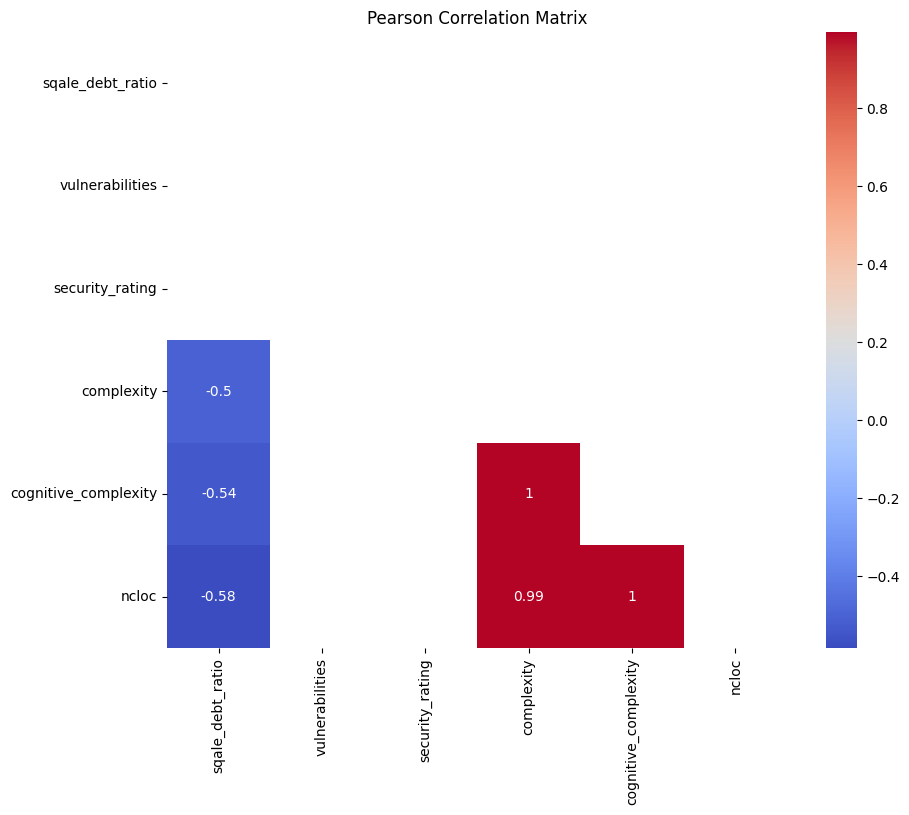

In [14]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

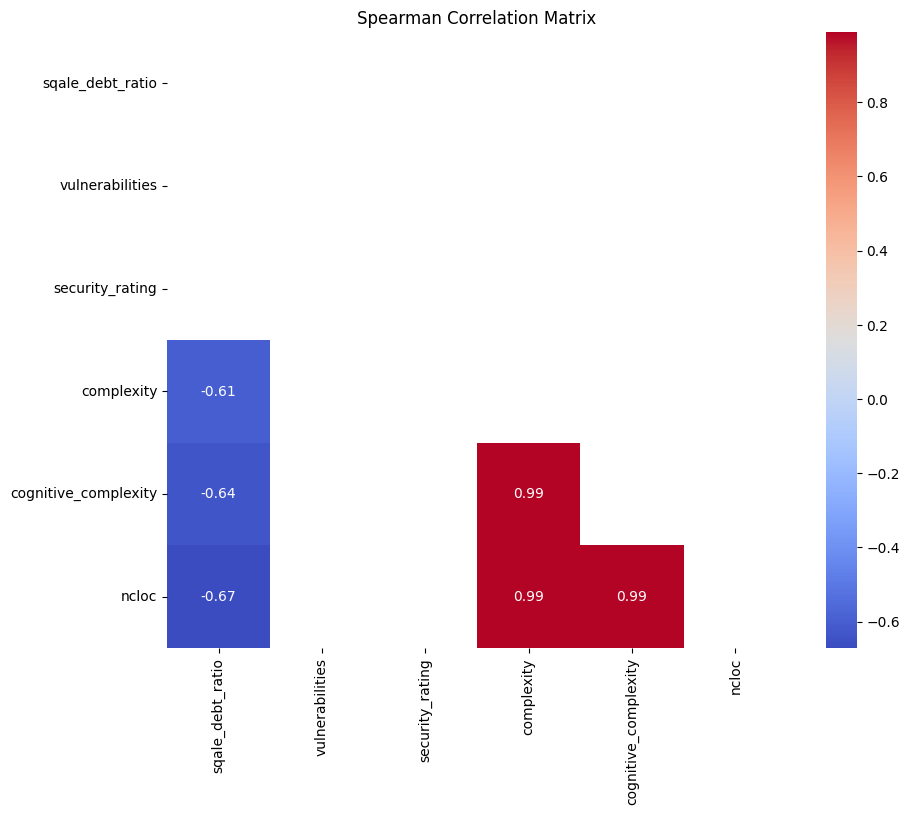

In [15]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [16]:
df['timestamp']

0     1479665674
1     1479700627
2     1479819871
3     1480107163
4     1480112805
5     1488604556
6     1488835051
7     1488839941
8     1488914760
9     1488994007
10    1514905321
11    1515275817
12    1515637863
13    1516330229
14    1516461694
15    1549633130
16    1555851960
17    1555269734
18    1556164208
19    1556248858
20    1578934746
21    1579022212
22    1579573095
23    1579792061
24    1579973179
25    1609552865
26    1609797181
27    1611615173
28    1611950790
29    1612812482
30    1641503291
31    1641939069
32    1642018516
33    1642203847
34    1643210322
35    1687440957
36    1685126972
37    1686277926
38    1687433690
39    1688024131
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [17]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [18]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
0.5    14
0.4    13
0.6     7
0.7     6
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
0    40
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
1.0    40
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    40
Name: count, dtype: int64
------------------------
Count for complexity
complexity
6797     2
588      2
10688    2
5967     2
8717     2
1753     2
321      1
6982     1
7996     1
8031     1
8090     1
8588     1
8146     1
8160     1
6974     1
8715     1
8727     1
10446    1
6979     1
6965     1
6968     1
375      1
5857     1
5858     1
6688     1
6692     1
6685     1
6677     1
1746     1
1572     1
1569     1
1567     1
480      1
10421    1
Name: count, dtype: int64
------------------------
Count for cognitive_complexity
cognitive_complexity
4826    2
4912    2
614     2
4897    2
6945    2
1396 

### Categorical Columns Visulaization

C:\Users\sadik\AppData\Local\Temp\ipykernel_8804\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_8804\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_8804\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_8804\130

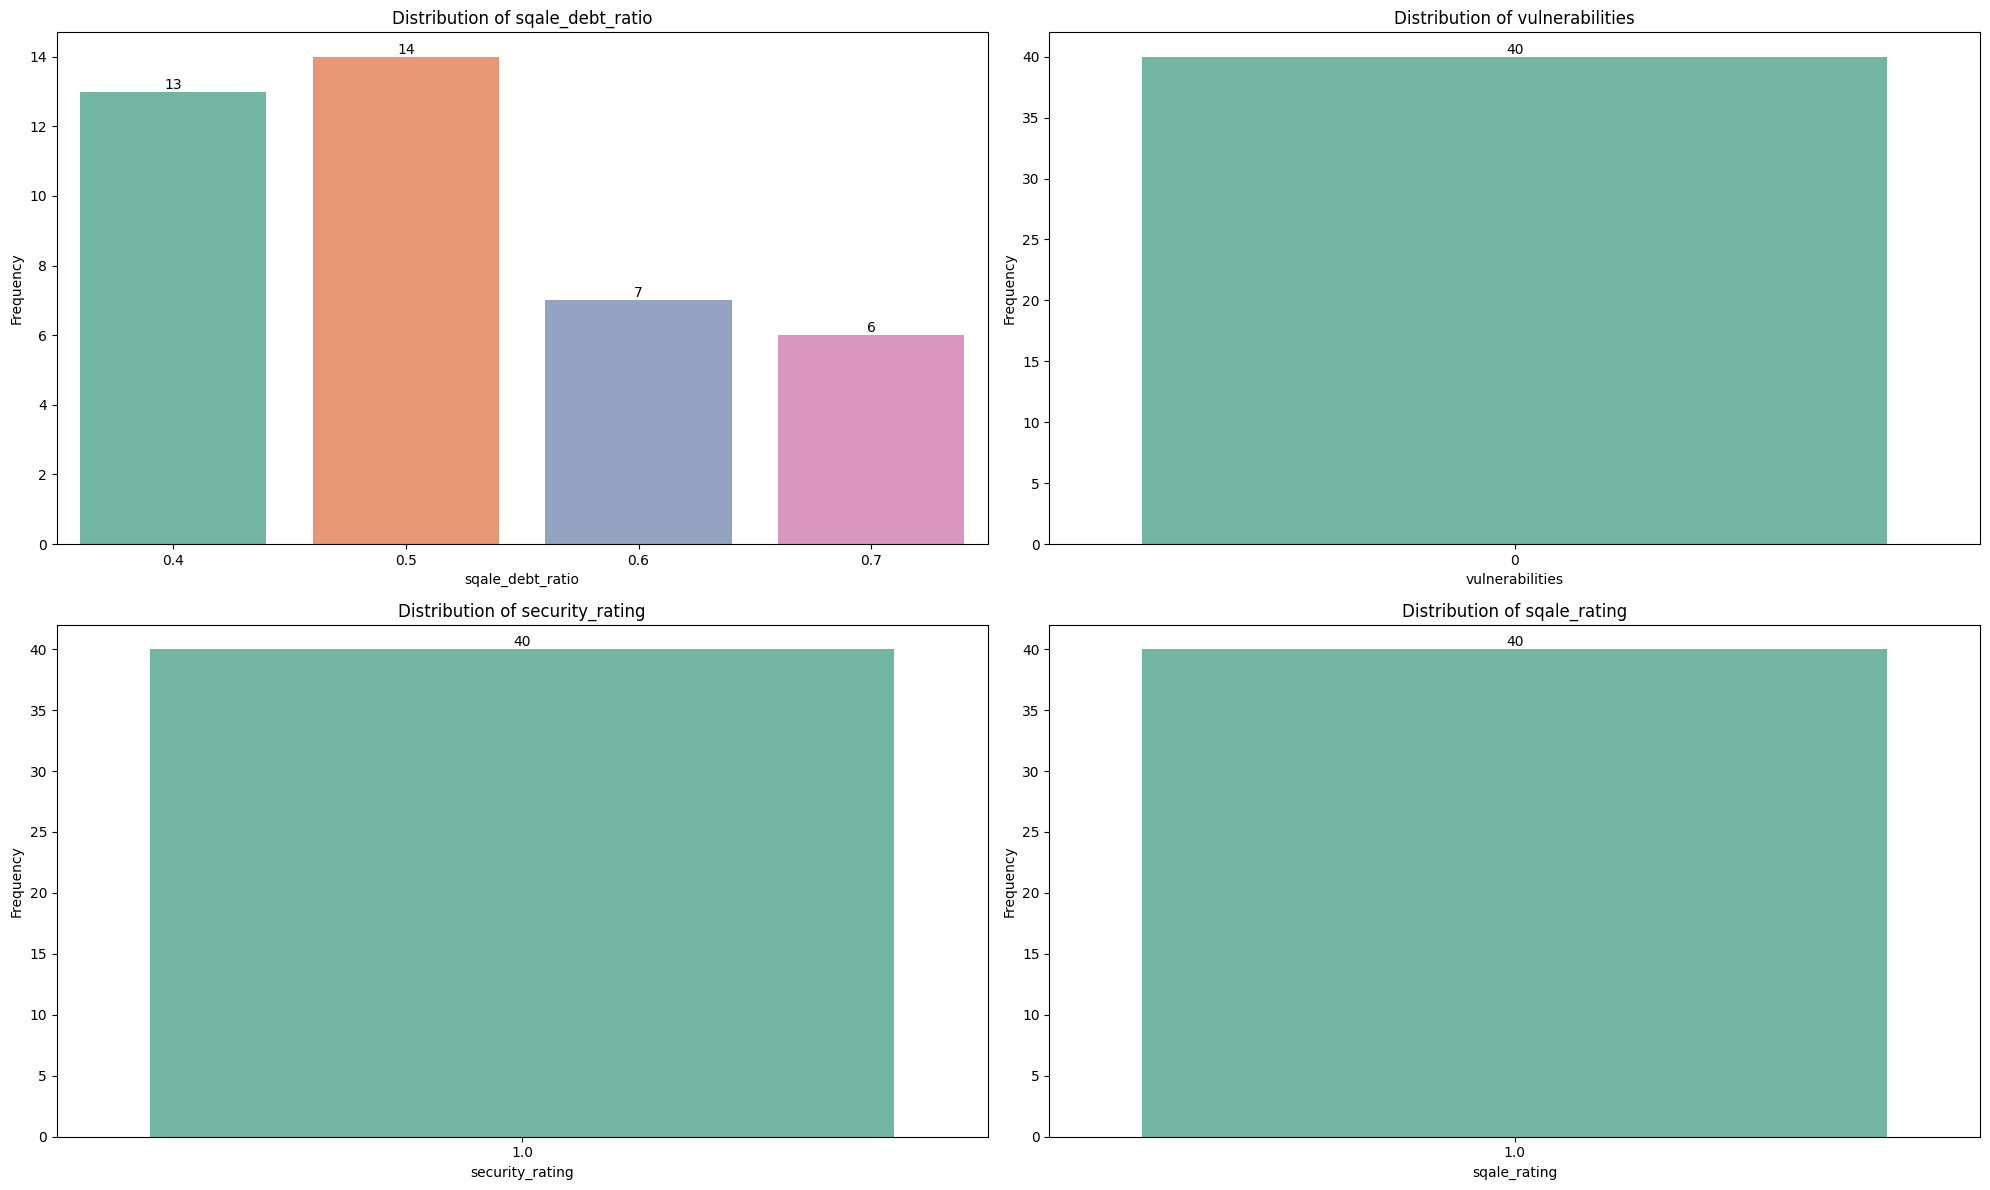

In [19]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

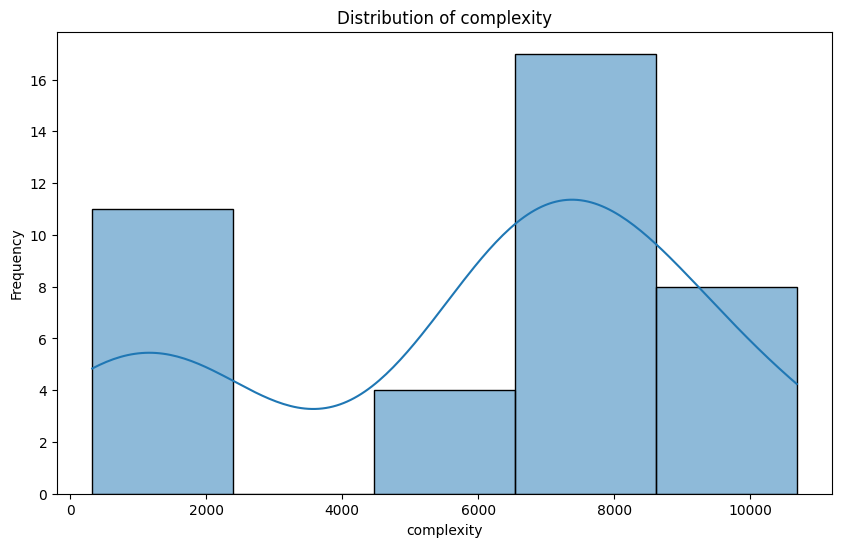

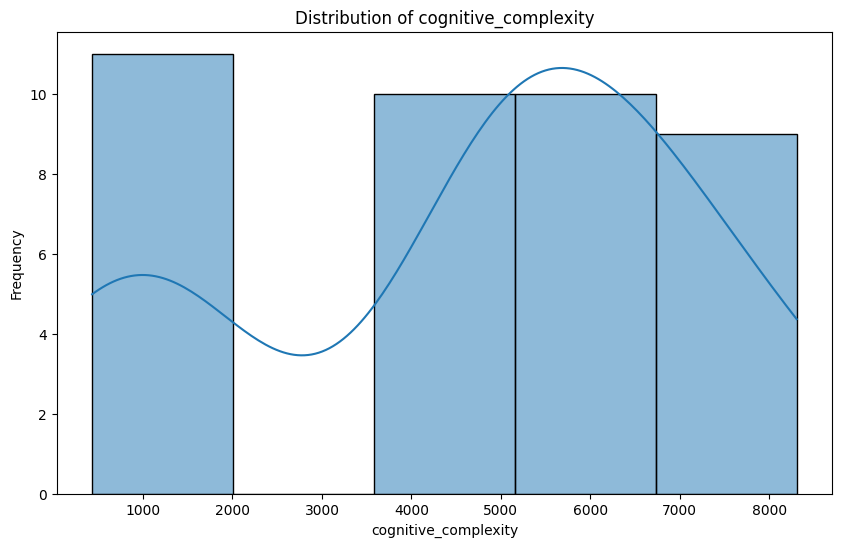

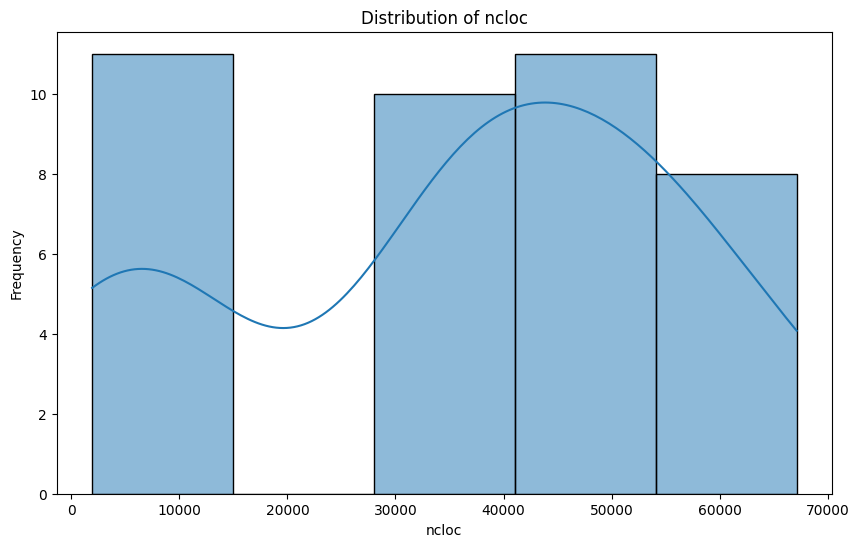

In [20]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot

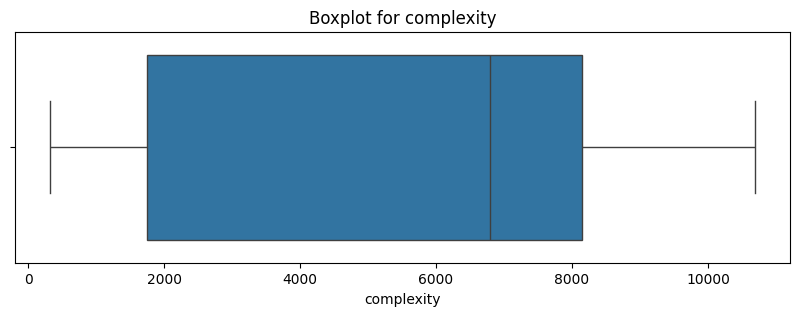

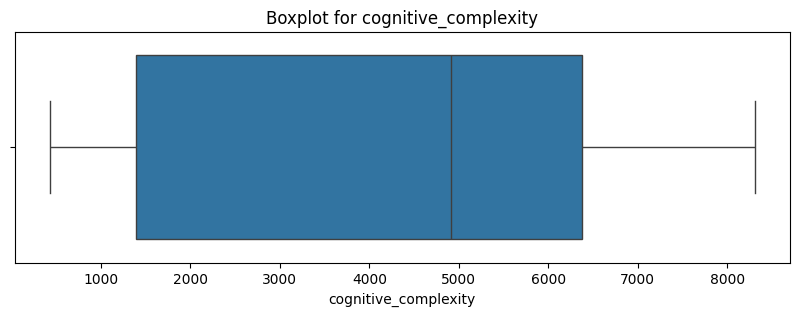

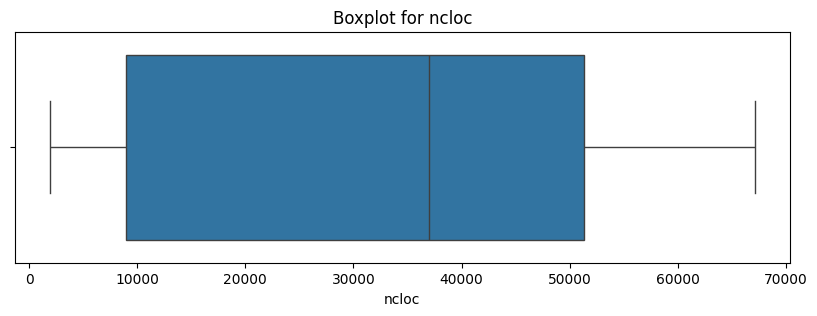

In [21]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Visualizing every column using Pairplot

In [22]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

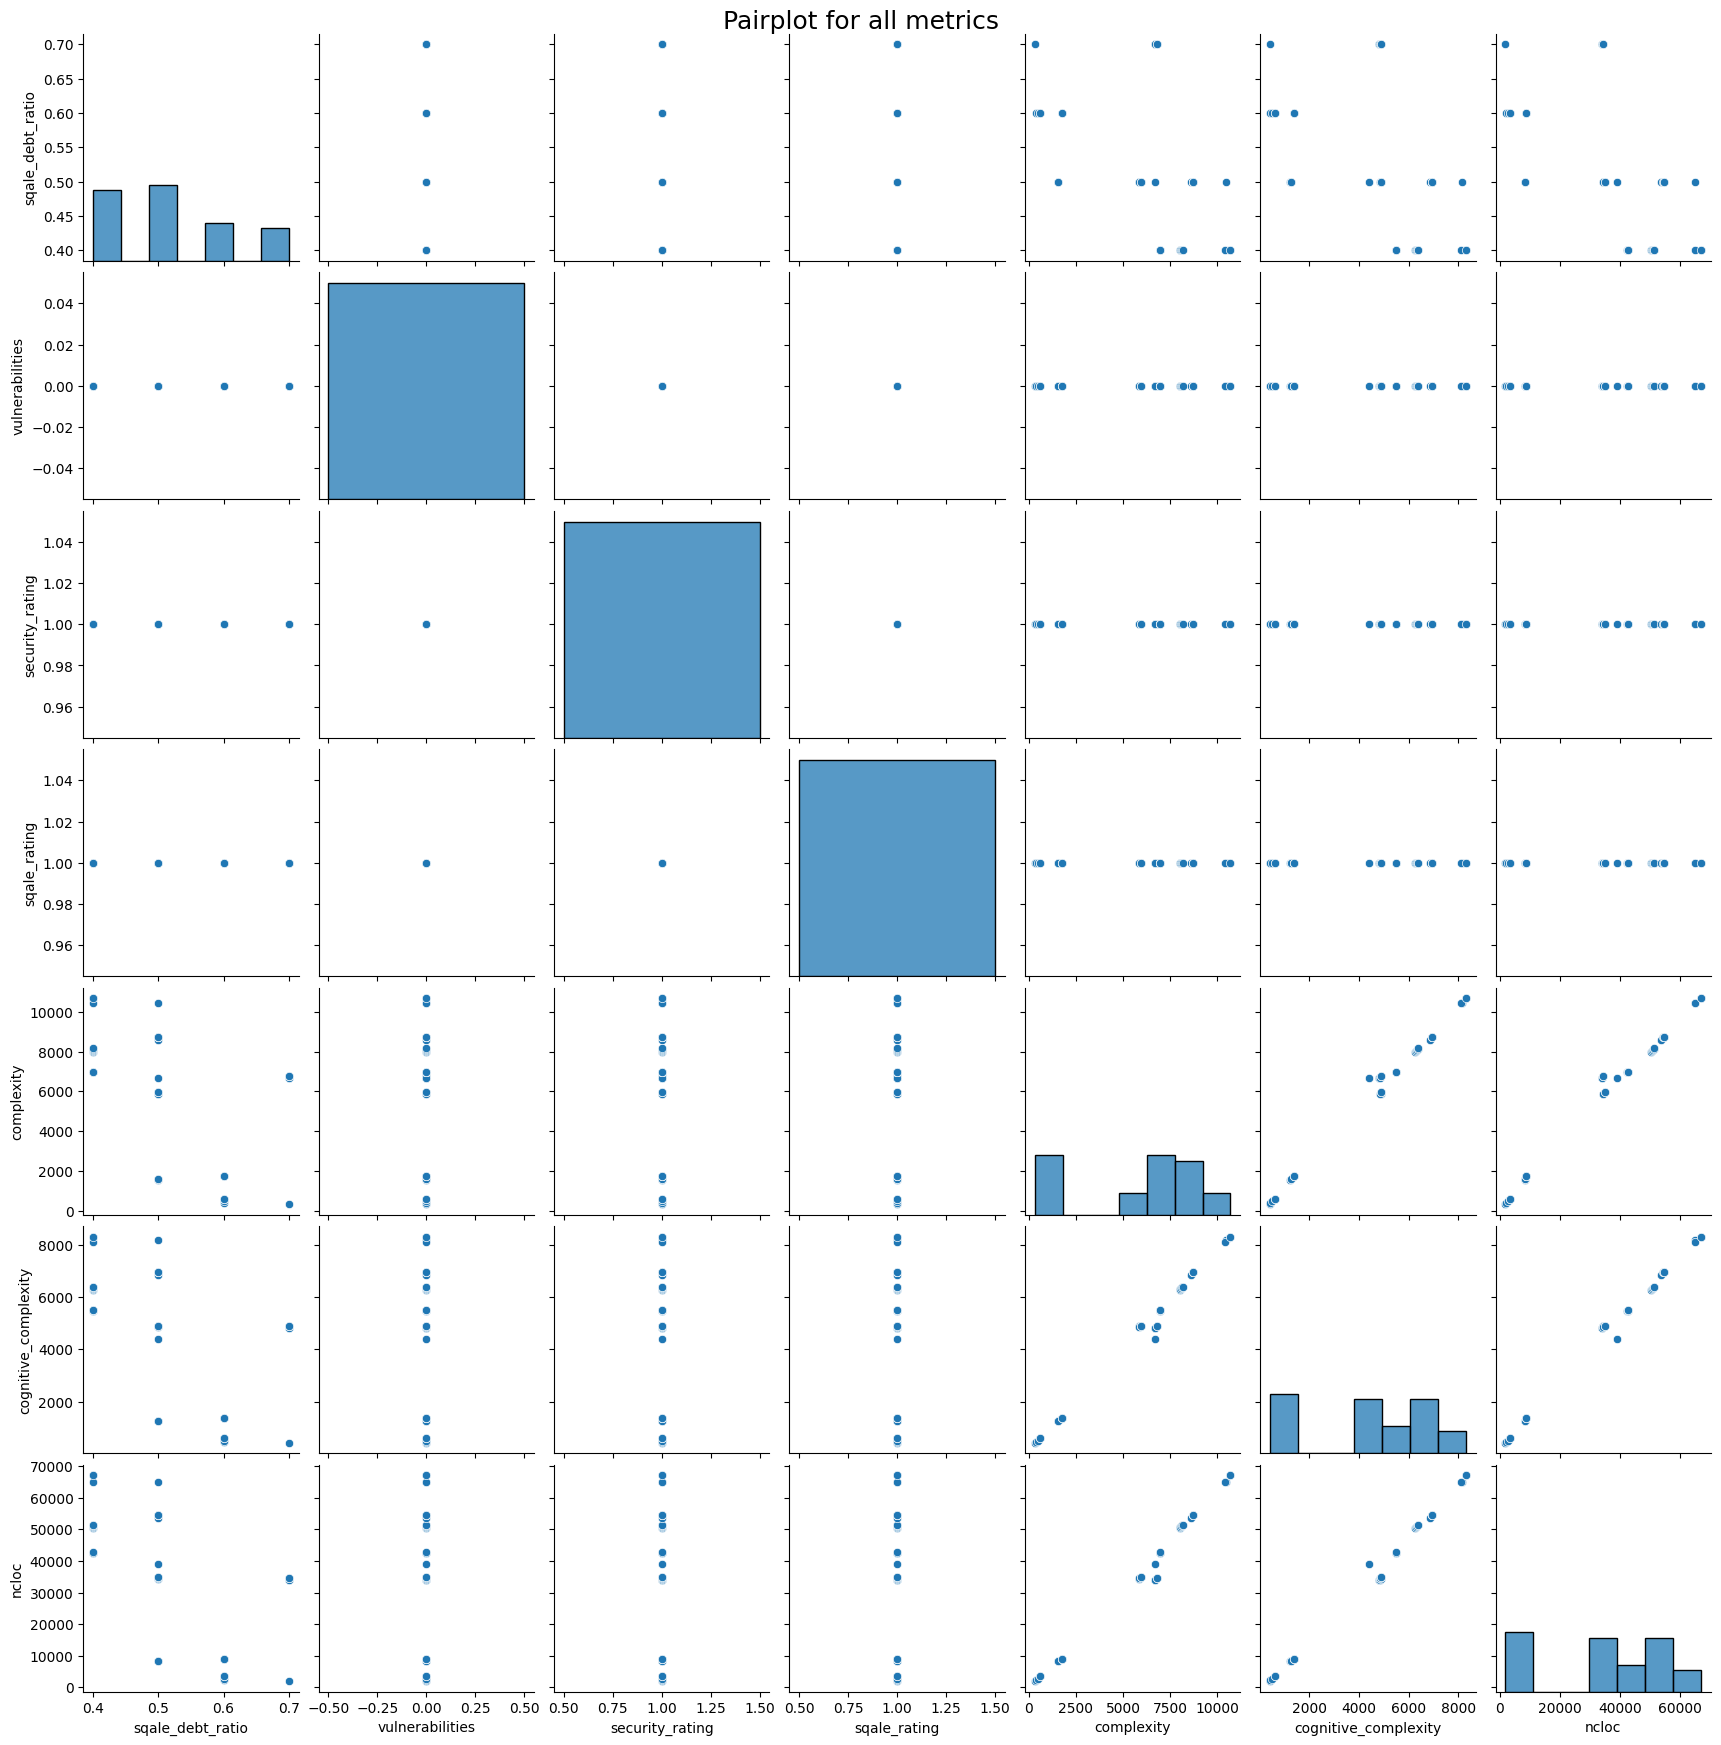

In [23]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [24]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 306814.96340217325
R-squared: 0.9556682659547581

Decision Tree Model for complexity:
Mean Squared Error: 11215.0
R-squared: 0.9983795431884928

Random Forest Model for complexity:
Mean Squared Error: 28348.018549999982
R-squared: 0.9959039911054766

Gradient Boosting Model for complexity:
Mean Squared Error: 73048.82505643027
R-squared: 0.9894451657480793

Support Vector Model for complexity:
Mean Squared Error: 438343.5566109374
R-squared: 0.9366636823815878

MLP Regressor Model for complexity:
Mean Squared Error: 338522.33169852605
R-squared: 0.951086864177603

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 118892.6596780641
R-squared: 0.9711181432597713

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 147602.375
R-squared: 0.9641438701025707

Random Forest Model for cognitive_complexity:
Mean Squared Error: 149295.76614999992
R-squared: 0.9637325050886842

Gradient Boosting Model fo

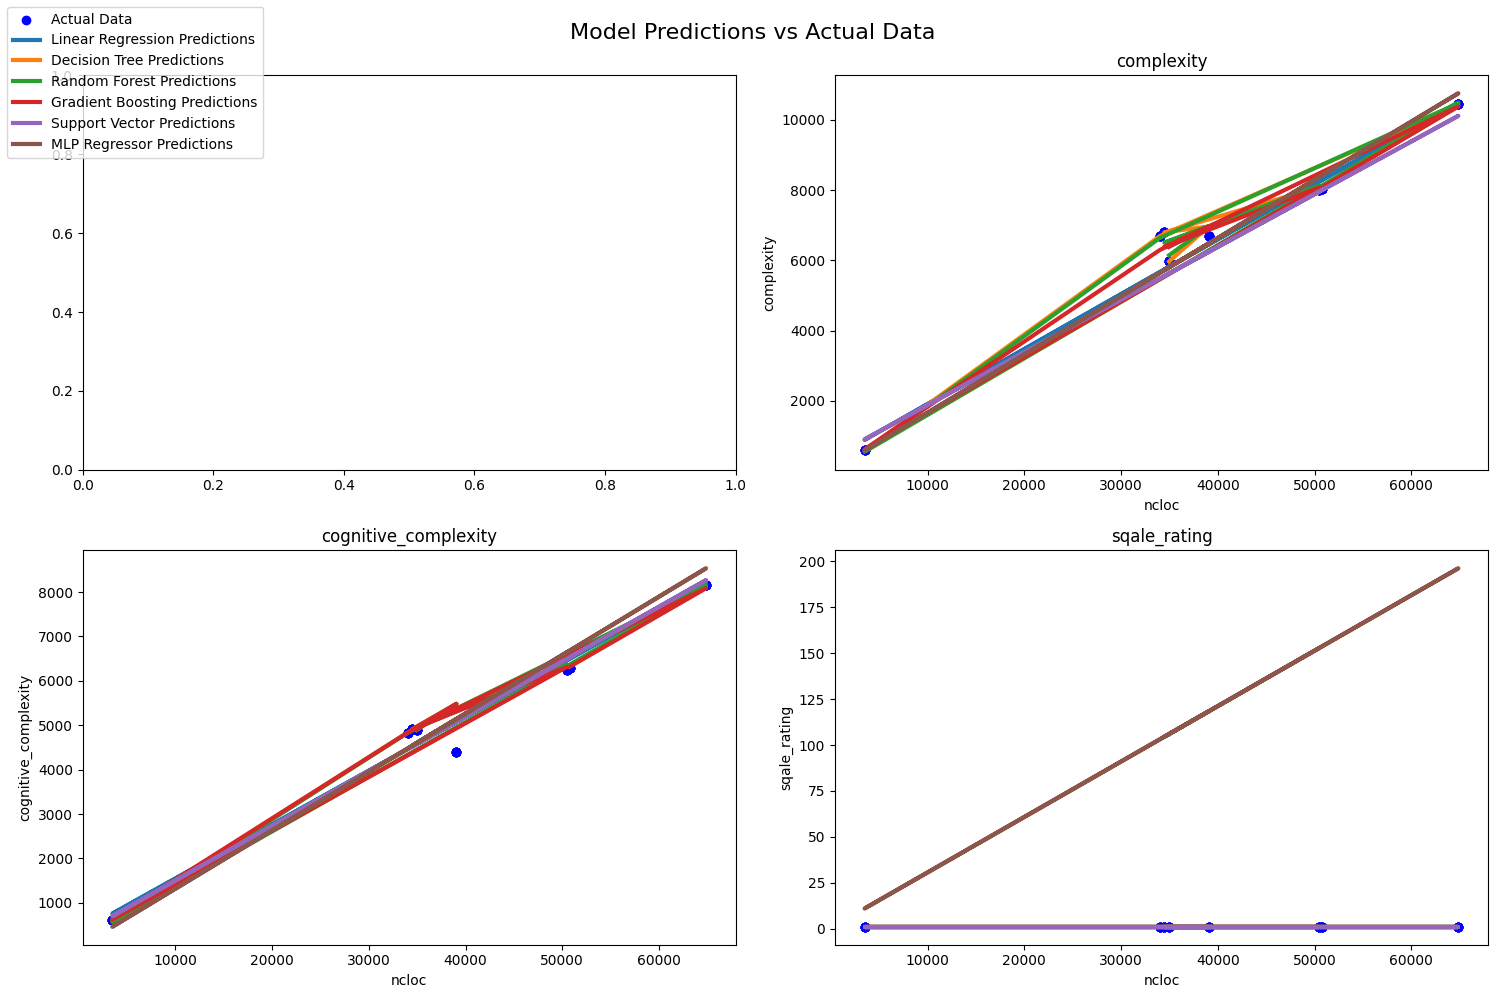

In [26]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 104327.45511498152
R-squared: 0.9849257124147762

Ensemble Model for cognitive_complexity:
Mean Squared Error: 115162.56044737958
R-squared: 0.9720242731411213

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



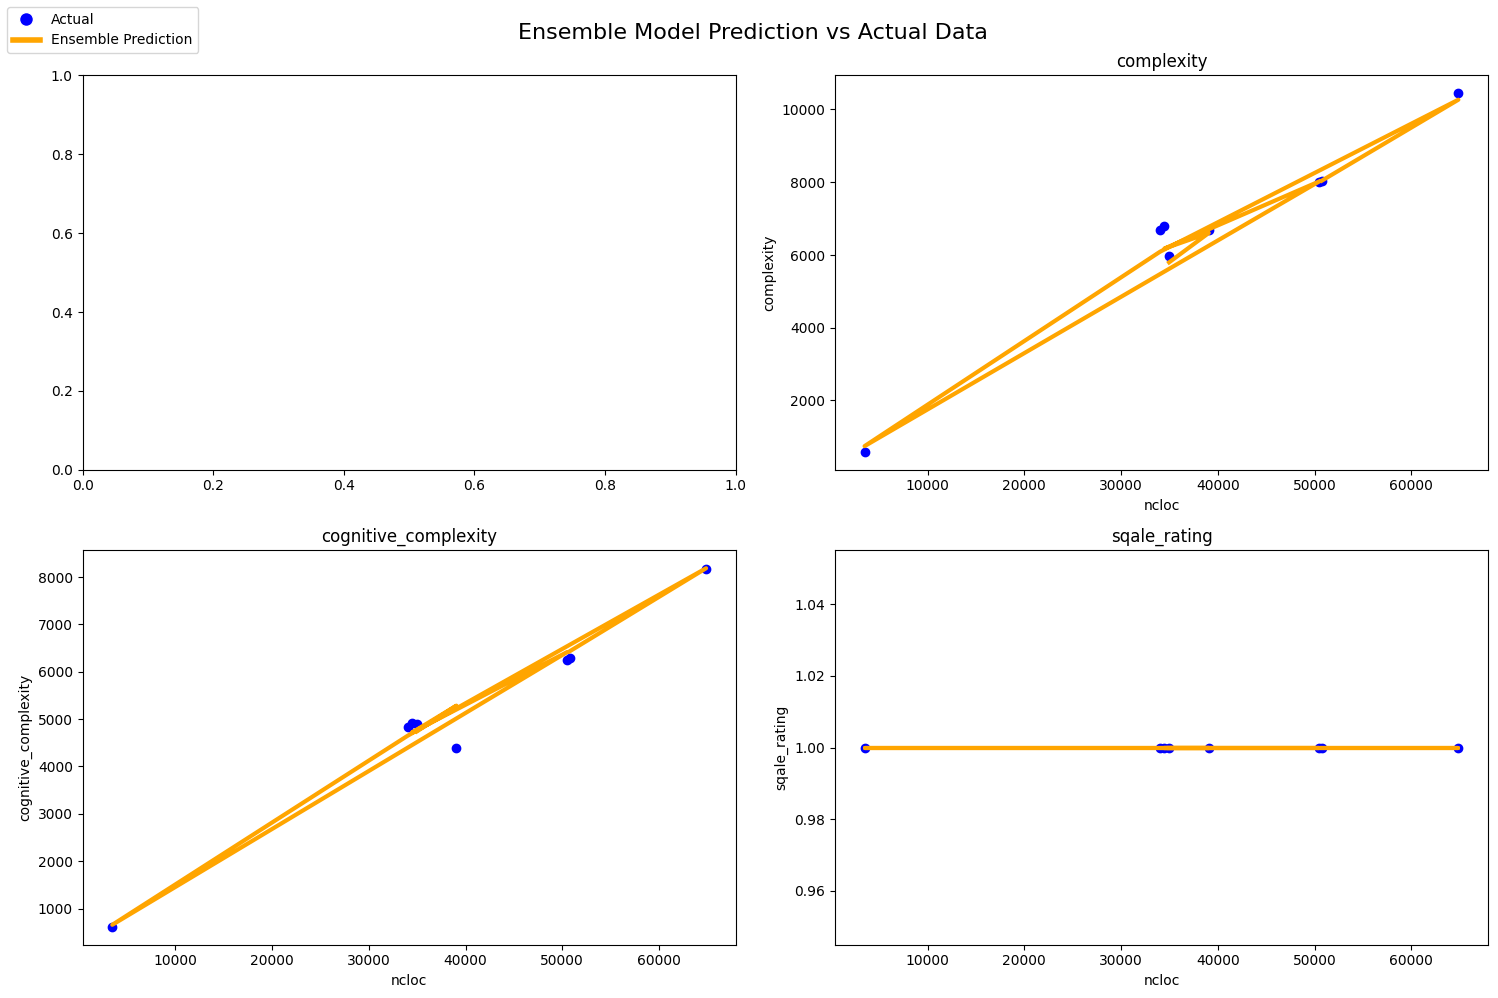

In [27]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()